# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bagus Aulia Rahman
- **Email:** a009ybf092@devacademy.id / bagusaulia007@gmail.com
- **ID Dicoding:** ghuzaul

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh musim dan cuaca terhadap permintaan penyewaan sepeda ?
- Pertanyaan 2 : Apakah ada perbedaan penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Mendapatkan Data day_df**

In [ ]:
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mendapatkan Data hour_df**

In [ ]:
hour_df = pd.read_csv("Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai tabel day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai tabel hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data pada kolom "dteday" tidak sesuai, dimana tipe data object harus diubah menjadi datetime.
- Pada tabel day_df dan hour_df tidak ditemukan missing value ataupun duplikat data.

### Cleaning Data

Pada tahap ini, pembersihan akan banyak dilakukan pada tabel day_df, sementara tabel hour_df tidak banyak dilakukan pembersihan karena tabel tersebut tidak terlalu digunakan berdasarkan pertanyaan bisnis.

**Memperbaiki tipe data pada kolom "dteday" dari object menjadi datetime**

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Menghapus kolom yang tidak diperlukan**
- instant : Index, sehingga tidak diperlukan.
- yr	: Tahun, sudah bisa dilihat dari dteday.
- mnth	: Bulan, sudah bisa dilihat dari dteday.
- weekday	: Hari dalam seminggu, karena yang diinginkan adalah data dari hari libur dan hari kerja.
- casual : Pengguna casual, dikarenakan pertanyaan bisnis menginginkan total pengguna, berarti cukup menggunakan kolom cnt.
- registered :	Pengguna terdaftar, dikarenakan pertanyaan bisnis menginginkan total pengguna, berarti cukup menggunakan kolom cnt.

In [14]:
drop_col = ['instant', 'yr', 'mnth', 'weekday', 'casual', 'registered']
day_df.drop(labels=drop_col, axis=1, inplace=True)

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   holiday     731 non-null    int64         
 3   workingday  731 non-null    int64         
 4   weathersit  731 non-null    int64         
 5   temp        731 non-null    float64       
 6   atemp       731 non-null    float64       
 7   hum         731 non-null    float64       
 8   windspeed   731 non-null    float64       
 9   cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 57.2 KB


**Mengubah nama beberapa kolom agar lebih jelas**
- dteday - date
- weathersit - weather
- cnt - count

In [16]:
day_df.rename(columns={
    "dteday": "date",
    "weathersit": "weather",
    "cnt": "count"
}, inplace = True
)

In [17]:
day_df.head()

,date,season,holiday,workingday,weather,temp,atemp,hum,windspeed,count
0,2011-01-01,1,0,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,1,0.226957,0.229270,0.436957,0.186900,1600


**Mengubah angka pada kolom season dan weathersit agar lebih jelas**

In [18]:
day_df['season'] = day_df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

In [19]:
day_df['weather'] = day_df['weather'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light_Rain',
    4: 'Heavy_Rain'
})

In [20]:
day_df.head()

,date,season,holiday,workingday,weather,temp,atemp,hum,windspeed,count
0,2011-01-01,spring,0,0,Mist,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,spring,0,0,Mist,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,spring,0,1,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,spring,0,1,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,spring,0,1,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data day_df

Statistik Keselurahan Data day_df

In [23]:
day_df.describe(include="all")

,date,season,holiday,workingday,weather,temp,atemp,hum,windspeed,count
count,731,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,0.028728,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,4504.348837
min,2011-01-01 00:00:00,NaN,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2011-07-02 12:00:00,NaN,0.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,2012-01-01 00:00:00,NaN,0.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,2012-07-01 12:00:00,NaN,0.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,5956.000000
max,2012-12-31 00:00:00,NaN,1.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,8714.000000


Statistik Penyewaan Sepeda Berdasarkan Musim

In [24]:
grouped_by_season = day_df.groupby(by="season")
grouped_by_season["count"].sum().sort_values(ascending=False)

aggregated_stats_by_season = grouped_by_season['count'].agg(
    ["mean", "median", "min", "max","sum"]
    )
aggregated_stats_by_season

,mean,median,min,max,sum
season,,,,,
fall,5644.303191,5353.5,1115,8714,1061129
spring,2604.132597,2209.0,431,7836,471348
summer,4992.331522,4941.5,795,8362,918589
winter,4728.162921,4634.5,22,8555,841613


Statistik Penyewaan Sepeda Berdasarkan Cuaca

In [25]:
grouped_by_weather = day_df.groupby(by="weather")
grouped_by_weather["count"].sum().sort_values(ascending=False)

aggregated_stats_by_weather = grouped_by_weather['count'].agg(
    ["mean", "median", "min", "max","sum"]
    )
aggregated_stats_by_weather

,mean,median,min,max,sum
weather,,,,,
Clear,4876.786177,4844.0,431,8714,2257952
Light_Rain,1803.285714,1817.0,22,4639,37869
Mist,4035.862348,4040.0,605,8362,996858


Statistik Penyewaan Sepeda Berdasarkan Hari Libur

In [26]:
grouped_by_holiday = day_df.groupby(by="holiday")
grouped_by_holiday["count"].sum().sort_values(ascending=False)

aggregated_stats_by_holiday = grouped_by_holiday['count'].agg(
    ["mean", "median", "min", "max","sum"]
    )
aggregated_stats_by_holiday

,mean,median,min,max,sum
holiday,,,,,
0,4527.104225,4558.0,22,8714,3214244
1,3735.000000,3351.0,1000,7403,78435


Statistik Penyewaan Sepeda Berdasarkan Hari Kerja

In [27]:
grouped_by_workday = day_df.groupby(by="workingday")
grouped_by_workday["count"].sum().sort_values(ascending=False)

aggregated_stats_by_workday = grouped_by_workday['count'].agg(
    ["mean", "median", "min", "max","sum"]
    )
aggregated_stats_by_workday

,mean,median,min,max,sum
workingday,,,,,
0,4330.168831,4459.0,605,8714,1000269
1,4584.820000,4582.0,22,8362,2292410


### Explore Data hour_df

**Statistik Keseluruhan Data hour_df**

In [28]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan cuaca terhadap permintaan penyewaan sepeda ?

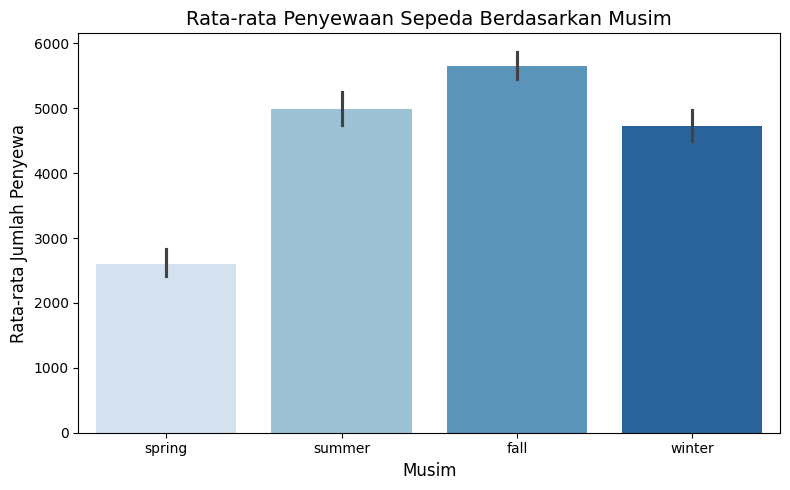

In [29]:
#Bar Plot Penyewaan Sepeda Berdasarkan Musim
plt.figure(figsize=(8,5))
sns.barplot(data=day_df, x='season', y='count', hue='season', palette='Blues')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.tight_layout()
plt.show()

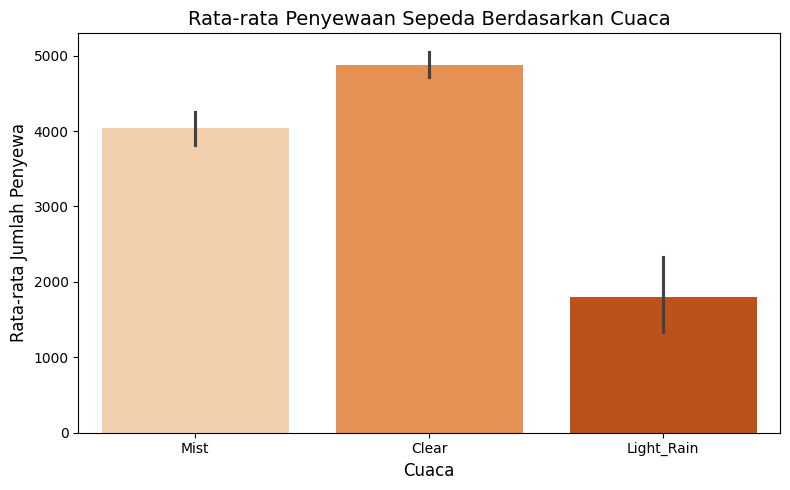

In [30]:
#Bar Plot Penyewaan Sepeda Berdasarkan Musim
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df, x='weather', y='count', hue= 'weather', palette='Oranges')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca', fontsize=14)
plt.xlabel('Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan musim, penyewaan sepeda paling tinggi terjadi pada musim gugur **(fall)**, diikuti oleh musim panas **(summer)**.
- Sementara itu, terjadi penurunan penyewaan sepeda pada saat musim dingin **(winter)**, hingga penyewaan sepeda paling rendah terjadi pada saat musim semi **(spring)**.
- Berdasarkan cuaca, penyewaan sepeda naik disaat cuaca sedang cerah **(clear)**, diikuti oleh cuaca berkabut **(mist)**.
- Sementara itu, penyewaan sepeda turun drastis disaat cuaca sedang hujan **(light rain)**.

### Pertanyaan 2: Apakah ada perbedaan penyewaan sepeda antara hari kerja dan hari libur?

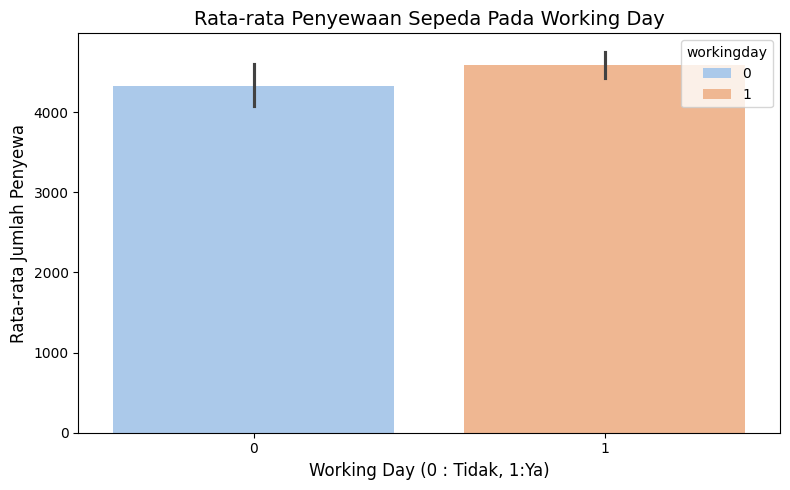

In [31]:
#Bar Plot Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df, x='workingday', y='count', hue= 'workingday', palette='pastel')
plt.title('Rata-rata Penyewaan Sepeda Pada Working Day', fontsize=14)
plt.xlabel('Working Day (0 : Tidak, 1:Ya)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.tight_layout()
plt.show()

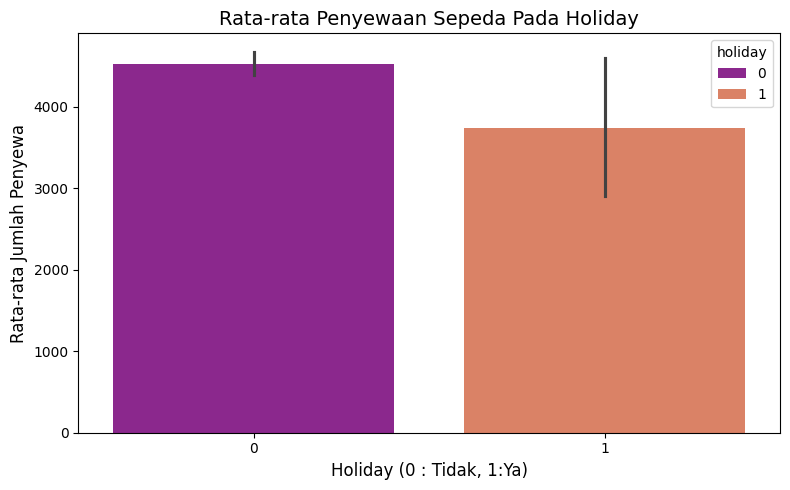

In [32]:
#Bar Plot Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df, x='holiday', y='count', hue = 'holiday', palette='plasma')
plt.title('Rata-rata Penyewaan Sepeda Pada Holiday', fontsize=14)
plt.xlabel('Holiday (0 : Tidak, 1:Ya)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewa', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah penyewaan sepeda cenderung lebih tinggi di hari kerja dibandingkan dengan hari libur nasional **(Holiday)**

## Conclusion

- **Conclution pertanyaan 1 :**
Berdasarkan hasil analisis, kondisi musim dan cuaca mempengaruhi jumlah penyewaan sepeda. Musim gugur (Fall) menjadi periode yang mencatatkan penyewaan tertinggi, sementara itu pada Musim Semi (Spring) menjadi periode yang mencatatkan penyewaan paling rendah diantara musim lainnya. Selain itu, kondisi cuaca yang cerah secara signifikan meningkatkan permintaan pengguna dalam menyewa sepeda, sedangkan cuaca hujan cenderung mengurangi permintaan.

- **Conclution pertanyaan 2 :**
Berdasarkan hasil analisis, ditemukan perbedaan jumlah pengguna penyewa sepeda pada hari kerja (Work Day) dengan hari libur nasional (Holiday), dimana jumlah penyewa pada hari biasa jauh lebih tinggi dibandingkan hari libur nasional, menunjukkan bahwa pengguna cenderung menyewa sepeda untuk transportasi ke tempat kerja / sekolah.

In [ ]:
day_df.to_csv("main_data.csv", index=False)